In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [4]:
cars = pd.read_excel('data/cars.xls', header=2, index_col=0)
cars = cars.iloc[:-2, :-1]

cars.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Российская Федерация,130.5,137.2,145.8,153.0,158.9,168.4,177.0,194.4,212.3,219.4,228.4,242.0,257.5,273.1,283.300000,288.814889,293.977164,304.962440,309.145615,315.455212,321.033072
Центральный федеральный округ,140.4,153.0,162.7,167.2,172.8,185.1,194.3,209.4,229.5,235.4,249.2,264.0,279.2,284.6,297.200499,301.912288,308.650268,315.906051,315.481268,320.762059,325.805025
Белгородская область,136.5,147.0,157.3,145.2,152.7,160.4,169.5,184.5,203.1,208.4,213.2,226.4,245.7,288.4,304.269040,308.823482,317.327005,328.737066,322.948938,321.814993,327.922173
Брянская область,58.3,62.1,66.9,70.8,77.3,82.4,89.7,99.2,115.5,120.4,125.1,129.4,139.3,166.6,186.801466,192.619671,199.295388,208.446196,202.325971,202.400698,206.611752
Владимирская область,104.6,112.8,118.0,123.5,128.8,137.5,145.3,163.3,181.9,191.3,206.6,223.6,238.4,266.3,272.777784,288.408000,274.392828,286.052224,296.184302,303.643328,309.936897


In [5]:
date_index = pd.date_range(start='2000', end='2021', freq='Y')

cars = cars.iloc[[0, 19, 32, 54]].transpose()
cars.index = date_index.year
cars.index.name = 'Год'
cars.head()

,Российская Федерация,г.Москва,г.Санкт-Петербург,Республика Татарстан
Год,,,,
2000,130.5,189.1,180.3,107.9
2001,137.2,197.0,168.1,110.1
2002,145.8,210.4,190.6,116.4
2003,153.0,215.9,199.8,121.5
2004,158.9,217.5,205.2,125.7


In [6]:
cars_rus_diff = cars.iloc[:, 0].diff()
cars_msk_diff = cars.iloc[:, 1].diff()
cars_spb_diff = cars.iloc[:, 2].diff()
cars_tat_diff = cars.iloc[:, 3].diff()

cars_rus_diff_pct = cars.iloc[:, 0].pct_change() * 100
cars_msk_diff_pct = cars.iloc[:, 1].pct_change() * 100
cars_spb_diff_pct = cars.iloc[:, 2].pct_change() * 100
cars_tat_diff_pct = cars.iloc[:, 3].pct_change() * 100

cars.insert(1, 'РФ, прирост', cars_rus_diff)
cars.insert(3, 'Мск, прирост', cars_msk_diff)
cars.insert(5, 'СПб, прирост', cars_spb_diff)
cars.insert(7, 'Тат, прирост', cars_tat_diff)

cars.insert(2, 'РФ, прирост в %', cars_rus_diff_pct)
cars.insert(5, 'Мск, прирост в %', cars_msk_diff_pct)
cars.insert(8, 'СПб, прирост в %', cars_spb_diff_pct)
cars.insert(11, 'Тат, прирост в %', cars_tat_diff_pct)

cars.head()

,Российская Федерация,"РФ, прирост","РФ, прирост в %",г.Москва,"Мск, прирост","Мск, прирост в %",г.Санкт-Петербург,"СПб, прирост","СПб, прирост в %",Республика Татарстан,"Тат, прирост","Тат, прирост в %"
Год,,,,,,,,,,,,
2000,130.5,NaN,NaN,189.1,NaN,NaN,180.3,NaN,NaN,107.9,NaN,NaN
2001,137.2,6.7,5.134100,197.0,7.9,4.177684,168.1,-12.2,-6.766500,110.1,2.2,2.038925
2002,145.8,8.6,6.268222,210.4,13.4,6.802030,190.6,22.5,13.384890,116.4,6.3,5.722071
2003,153.0,7.2,4.938272,215.9,5.5,2.614068,199.8,9.2,4.826863,121.5,5.1,4.381443
2004,158.9,5.9,3.856209,217.5,1.6,0.741084,205.2,5.4,2.702703,125.7,4.2,3.456790


In [7]:
cols_lev0 = ['Российская Федерация', 'Москва', 'Санкт-Петербург', 'Татарстан']
cols_lev1 = ['Кол-во', 'Прирост', 'Прирост в %']
multicols = pd.MultiIndex.from_product([cols_lev0, cols_lev1], 
                                       names=['Субъект', 'Легковые авто'])

cars.columns = multicols

cars.head()

Субъект       Российская Федерация          ... Татарстан            
Легковые авто               Кол-во Прирост  ...   Прирост Прирост в %
Год                                         ...                      
2000                         130.5     NaN  ...       NaN         NaN
2001                         137.2     6.7  ...       2.2    2.038925
2002                         145.8     8.6  ...       6.3    5.722071
2003                         153.0     7.2  ...       5.1    4.381443
2004                         158.9     5.9  ...       4.2    3.456790

[5 rows x 12 columns]

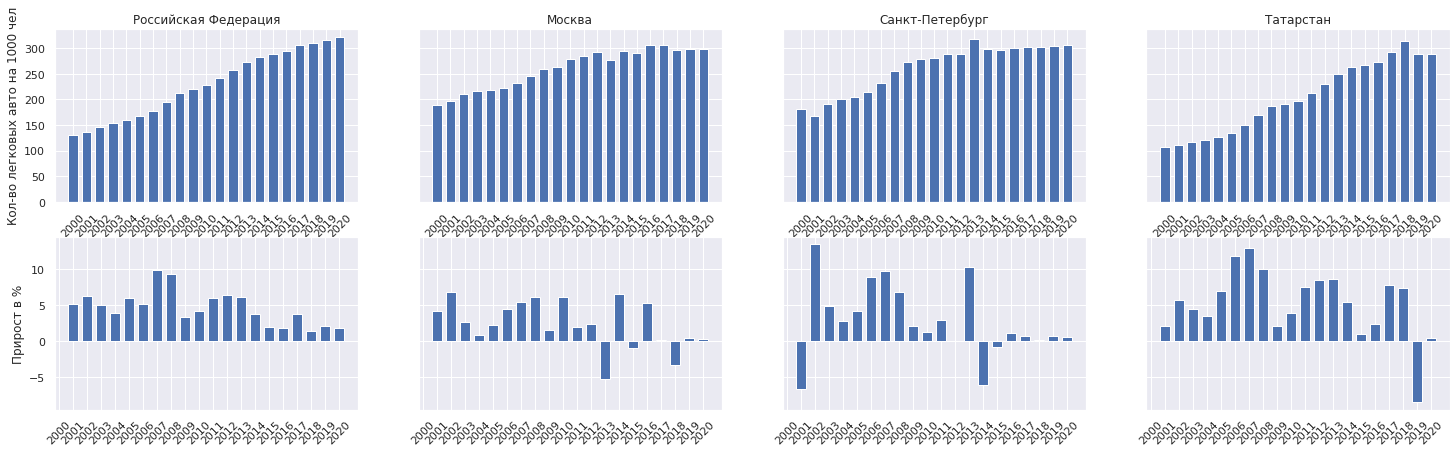

In [19]:
cars_abs = 0
cars_pct = 2

bar_params = {'width':0.7, 'tick_label':cars.index}

fig, ax = plt.subplots(2, 4, figsize=(25,7), sharey='row')
ax[0, 0].set(ylabel='Кол-во легковых авто на 1000 чел')
ax[1, 0].set(ylabel='Прирост в %')
for i in range(4):
  ax[0, i].bar(x=cars.index, height=cars.iloc[:, cars_abs], **bar_params)
  ax[0, i].tick_params(axis='x', rotation=45)
  ax[0, i].set(title=cols_lev0[i])
  ax[1, i].bar(x=cars.index, height=cars.iloc[:, cars_pct], **bar_params)
  ax[1, i].tick_params(axis='x', rotation=45)

  cars_abs += 3
  cars_pct += 3

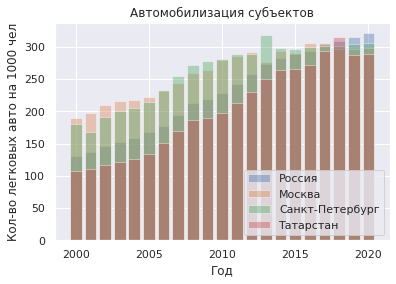

In [17]:
plt.bar(x=cars.index, height=cars.iloc[:, 0], label='Россия', alpha=0.4)
plt.bar(x=cars.index, height=cars.iloc[:, 3], label='Москва', alpha=0.4)
plt.bar(x=cars.index, height=cars.iloc[:, 6], label='Санкт-Петербург', alpha=0.4)
plt.bar(x=cars.index, height=cars.iloc[:, 9], label='Татарстан', alpha=0.4)
plt.title('Автомобилизация субъектов')
plt.xlabel('Год')
plt.ylabel('Кол-во легковых авто на 1000 чел')
plt.legend(loc='lower right');